In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

VADER is a sentiment analysis tool trained for social media. Phrases are assigned positive, negative, and neutral scores, as well as a summative 'compound' score.

> _Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014._

In [ ]:
analyzer.polarity_scores("Toy Story 2 was OK!")

{'compound': 0.4981, 'neg': 0.0, 'neu': 0.482, 'pos': 0.518}

## Prepare the Data

Load a Trump Tweet dataset from [Sasha Perigo](https://github.com/sashaperigo/Trump-Tweets), give it a DateTime index, and assign sentiment score for each tweet.

In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/sashaperigo/Trump-Tweets/master/data.csv").dropna()
tweets['Date'] = pd.to_datetime(tweets['Date'])
tweets = tweets.set_index('Date').sort_index()
tweets['sentiment'] = tweets['Text'].apply(lambda tweet: analyzer.polarity_scores(tweet)['compound'])
tweets['is_RT'] = (tweets['Text'].str.startswith('"@') | tweets['Text'].str.startswith('@'))
tweets.head()

,Text,Favorites,Retweets,Tweet ID,sentiment
Date,,,,,
2009-05-04 14:54:25,Be sure to tune in and watch Donald Trump on L...,132,179,1698308935,0.5255
2009-05-04 21:00:10,Donald Trump will be appearing on The View tom...,2,1,1701461182,0.7712
2009-05-08 09:38:08,Donald Trump reads Top Ten Financial Tips on L...,1,2,1737479987,0.6468
2009-05-08 16:40:15,New Blog Post: Celebrity Apprentice Finale and...,0,1,1741160716,0.0000
2009-05-12 10:07:28,"""My persona will never be that of a wallflower...",1903,1382,1773561338,0.0000


# What are the most positive and most negative tweets?

The most negative tweets, according to VADER:

In [ ]:
for tweet in tweets.sort_values('sentiment').iloc[:7]['Text']:
    print(tweet)

I love the Mexican people, but Mexico is not our friend. They're killing us at the border and they're killing us on jobs and trade. FIGHT!
If Graydon Carter's very dumb bosses would fire him for his terrible circulation numbers at failing Vanity Fair-his bad food restaurants die
If Graydon Carter's very dumb bosses would fire him for his terrible circulation numbers at failing Vanity Fair-his bad food restaurants die
At least 12 dead and 50 wounded in Colorado--bring back fast trials & death penalty for mass murderers & terrorists.
How come every time I show anger, disgust or impatience, enemies say I had a tantrum or meltdown—stupid or dishonest people?
General John Allen, who I never met but spoke against me last night, failed badly in his fight against ISIS. His record = BAD  #NeverHillary
We must stop the crime and killing machine that is illegal immigration. Rampant problems will only get worse. Take back our country!


The most positive tweets tend to be compliments, especially retweets of compliments to Trump.

In [ ]:
for tweet in tweets.sort_values('sentiment').iloc[-7:]['Text']:
    print(tweet)

Have a fantastic, beautiful and happy Easter everyone and then, when Easter is over, have great wins and triumphs in life. Never give up!
"@Joe_Hurwitz: @realDonaldTrump WOW YOU ARE GREAT AND YOUR HAIR IS AWESOME"  Wow, I love the second part!
"@VladimirRussia7  @realDonaldTrump You are the best #billionare and the great teacher!I love your inspiring books!" Thanks and good luck.
"@barnard_sonja: @realDonaldTrump I wish I had your confidence!"  WIN, WIN, WIN and you will develop great confidence!
"@LisaMills62: @realDonaldTrump You're so successful & admirable yet your greatest masterpiece remains your awesome children!"  Thanks!
.@bubbawatson  What a great player you have turned out to be but also, what a great guy! Congratulations on another fantastic Masters win.
Good luck and best wishes to my dear friend, the wonderful and very talented Joan Rivers!  Winner of Celebrity Apprentice, amazing woman.


## What is the mean sentiment over time

There are two ways to do this. First, `groupby` can be used with a Datatime index to group by some time span - in this case, 2m.

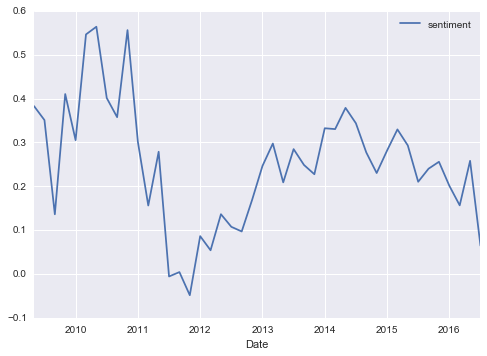

In [ ]:
tweets.groupby(pd.TimeGrouper(freq='2m'))[['sentiment']].mean().plot()

_Because of the relative sparsity of tweets before 2012, going forward I'll focus on 2012-, specified with `tweets[tweets.index >= '2012']`._

In Pandas 0.19 and above, there is a `.rolling()` method that supports rolling operations on a frame. Here is an example of 60 day rolling mean:

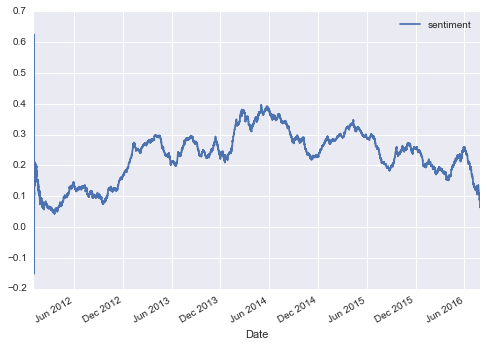

In [ ]:
tweets[tweets.index >= '2012'].rolling('60d')[['sentiment']].mean().plot()

## Bursts of sentiment

A rolling _sum_ can be useful for finding a flurry of negative or positive tweets in a short amount of time.

The most negative 2h window occurred around these dates:

In [ ]:
tweets.rolling('2h')[['sentiment']].sum().sort_values('sentiment').head()

,sentiment
Date,
2016-03-24 11:59:13,-6.2669
2016-03-24 12:02:06,-6.2669
2016-03-24 11:55:32,-5.7743
2014-03-02 23:26:31,-4.9357
2016-03-24 11:52:11,-4.9030


These dates are the right edge of the window, so subtract 2 hours to get the start time.

The most negative window seems to respond to various television issues. Trump slams GOP politicians in response to a negative interview, then alternates between the dual disasters of terrorism and The View.

In [ ]:
for tweet in tweets['2016-03-24 9:59:13':'2016-03-24 11:59:13']['Text']:
    print(tweet)

It is amazing how @LindseyGrahamSC gets on so many T.V. shows talking negatively about me when I beat him so badly (ZERO) in his pres run!
.@LindseyGrahamSC and Lyin' Ted Cruz are two politicians who are very much alike - ALL TALK AND NO ACTION! Both talk about ISIS, do nothing!
These politicians like Cruz and Graham, who have watched ISIS and many other problems develop for years, do nothing to make things better!
Remember when I recently said that Brussels is a "hell hole" and a mess and the failing @nytimes wrote a critical article. I was so right!
It is amazing how often I am right, only to be criticized by the media. Illegal immigration, take the oil, build the wall, Muslims, NATO!
"@TimVincent56:  @LindseyGrahamSC Talkers think about the future, Doers are already building it" #VoteTrump2016 pic.twitter.com/OoB38jypsD"
Hillary Clinton has been working on solving the terrorism problem for years. TIME FOR A CHANGE, I WILL SOLVE - AND FAST!
.@TheView T.V. show, which is failing so ba

## How do retweets correlate with sentiment?

A confounding factor for RT count is the significant growth in attention to Trump's tweets since 2015:

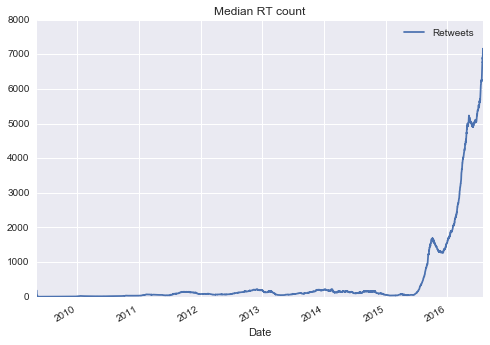

In [ ]:
tweets.query('not is_RT').rolling('60d')[['Retweets']].median().plot(title='Median RT count')

For now, just focus on recent tweets that have a non-neutral sentiment.

In [ ]:
recent_tweets = tweets[tweets.index >= "2015 06"].query('not is_RT and sentiment != 0').copy()

Organize the retweets into quantiles, to compare the sentiment distribution for lower and higher retweet counts.

In [ ]:
import numpy as np
quantile_bin_ranges = np.linspace(0, 1, 11)
retweet_bins = [recent_tweets['Retweets'].quantile(n) for n in quantile_bin_ranges]
retweet_bin_labels = (quantile_bin_ranges * 100)[:-1].astype(int).astype(str)
recent_tweets['RT_bin'] = pd.cut(recent_tweets['Retweets'], bins=retweet_bins, labels=retweet_bin_labels)

The plot below shows the distribution of sentiment scores in each quantile. Despite positive tweets outnumbering the negative ones, negative tweets are retweeted disproportionally often.

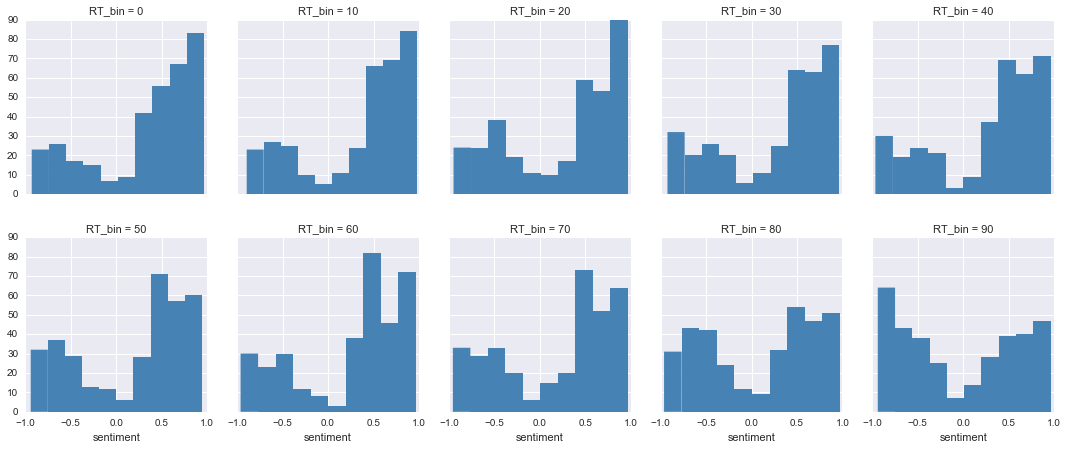

In [ ]:
g = sns.FacetGrid(recent_tweets, col='RT_bin', col_wrap=5, margin_titles=True)
g.map(plt.hist, "sentiment", color="steelblue", lw=0)